Examples of using the `pygravlens` code for microlensing calculations.

By Chuck Keeton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygravlens as gl

# Single lens

Create a point mass lens at the origin with an Einstein radius of 1. Set up the model, compute the tiling, and plot. Here we use the default grid.

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


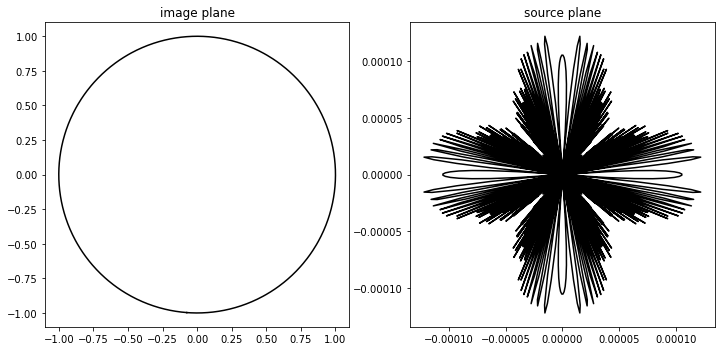

In [2]:
plane = gl.lensplane('ptmass',[0.0,0.0,1.0])
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot()

Note: the funny features in the source plane plot are caused by numerical noise.

Solve the lens equation for a sample source.

In [3]:
imgarr,muarr = model.findimg([0.6,0.0])
print('positions')
print(imgarr)
print('magnifications')
print(muarr)
print(model.totmag([0.6,0.0]))

positions
[[ 1.34403064e+00 -1.44259991e-08]
 [-7.44030668e-01  3.79450786e-08]]
magnifications
[ 1.44186253 -0.44186257]
1.8837251004817412


Compute a light curve, which should match the Paczynski function

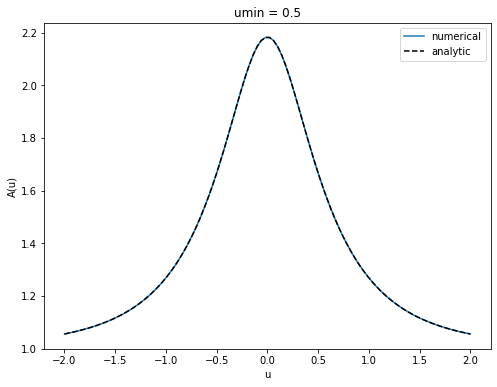

In [4]:
uarr = np.linspace(-2.0,2.0,100)
v0 = 0.5
uvarr = [ [u,v0] for u in uarr]
lcrv = model.totmag(uvarr)

# Paczynski model
uu = np.linalg.norm(uvarr,axis=1)
Pmod = (uu**2+2.0)/(uu*np.sqrt(uu**2+4))

# plot
plt.figure(figsize=(8,6))
plt.plot(uarr,lcrv,label='numerical')
plt.plot(uarr,Pmod,label='analytic',color='black',linestyle='dashed')
plt.xlabel('u')
plt.ylabel('A(u)')
plt.title('umin = '+str(v0))
plt.legend(fontsize=10)
plt.show()

# Binary

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:94: RuntimeWarning: invalid value encountered in true_divide
  cost = dx[:,0]/r
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:95: RuntimeWarning: invalid value encountered in true_divide
  sint = dx[:,1]/r
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:101: RuntimeWarning: divide by zero encountered in true_divide
  phir_r = thetaE**2/r**2
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:103: RuntimeWarning: invalid value encountered in multiply
  phixx  = phir_r*sint*sint + phirr*cost*cost
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:104: RuntimeWarning: invalid value encountered in multiply
  phiyy  = phir_r*cost*cost + phirr*sint*sint
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:105: RuntimeWarning: invalid value encountered in multiply
  phixy  = (phirr-phir_r)*sint*cost
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:107: RuntimeWarning: invalid value encountered in multiply
  alpha += np.ar

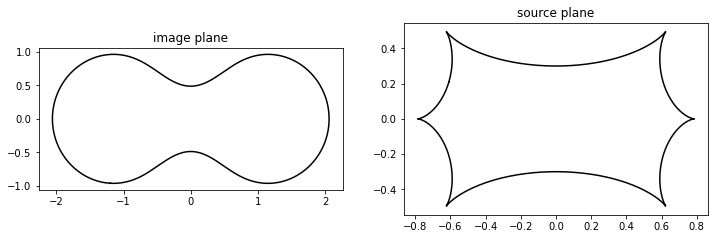

In [5]:
plane = gl.lensplane('ptmass',[[-1.0,0.0,1.0],[1.0,0.0,1.0]])
model = gl.lensmodel([plane])
model.maingrid(-3,3,20,-2,2,20)
model.galgrid(1.0e-6,2.0,20,20)
model.tile()
model.plot()

Let's reproduce Figs. 5.2 and 5.3 in the book by Congdon & Keeton (https://link.springer.com/book/10.1007/978-3-030-02122-1).

Equal mass

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-G

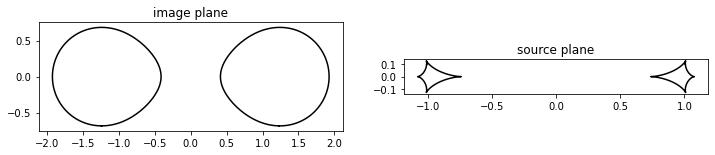

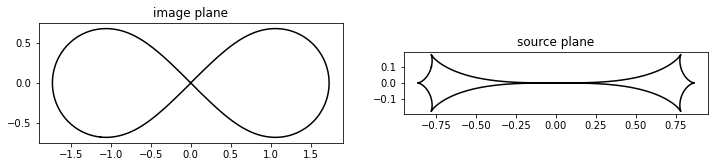

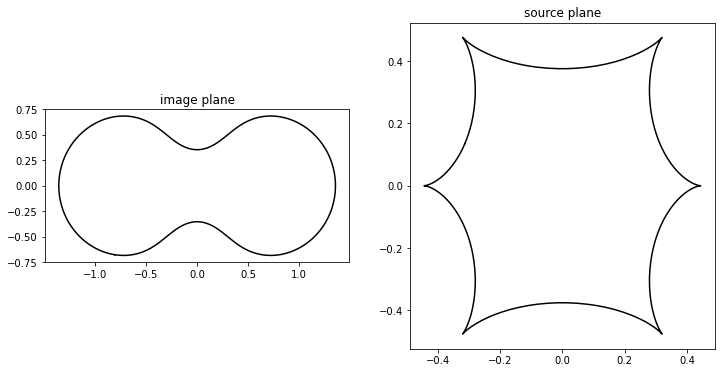

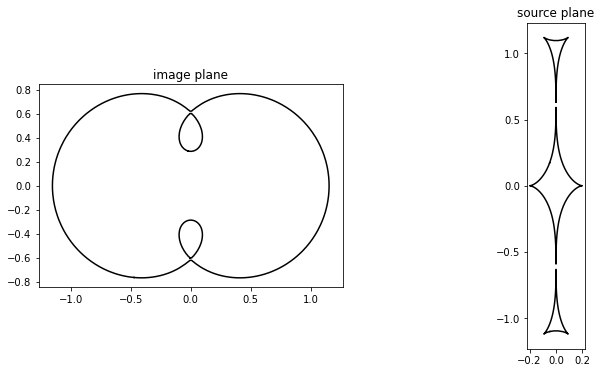

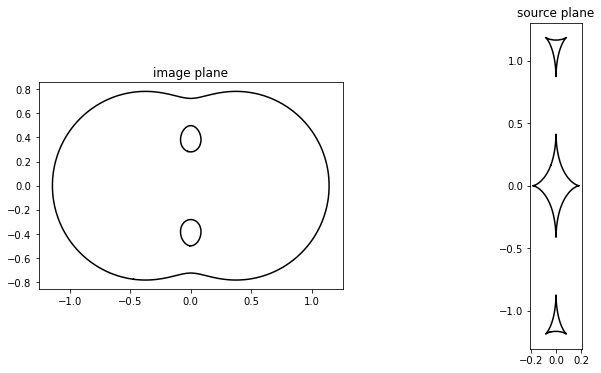

In [6]:
m1 = 0.5
m2 = 0.5

for d in (2.4, 2.0, 1.2, 0.707, 0.68):
    plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
    model = gl.lensmodel([plane])
    model.maingrid(-4,4,40,-2,2,20)
    model.tile()
    model.plot()

Unequal mass

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-G

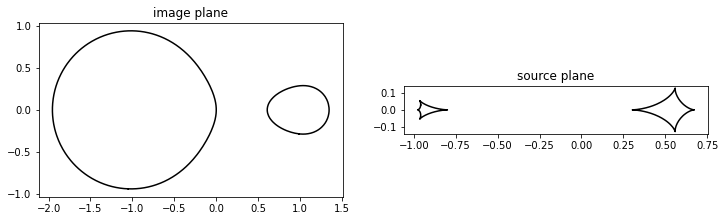

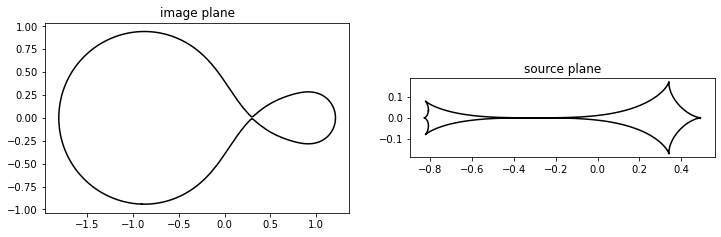

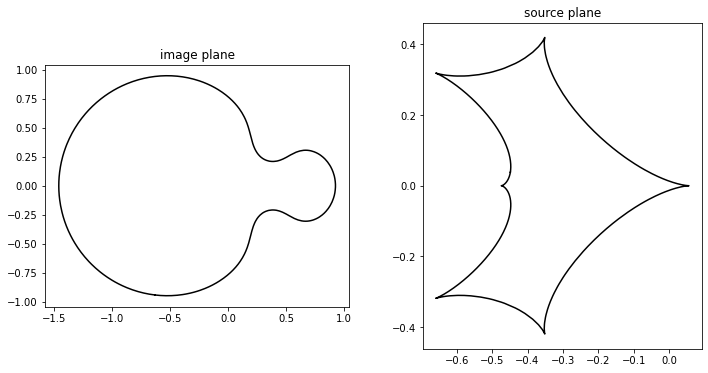

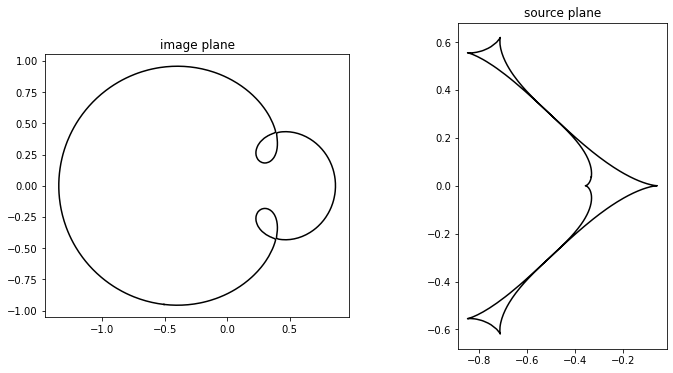

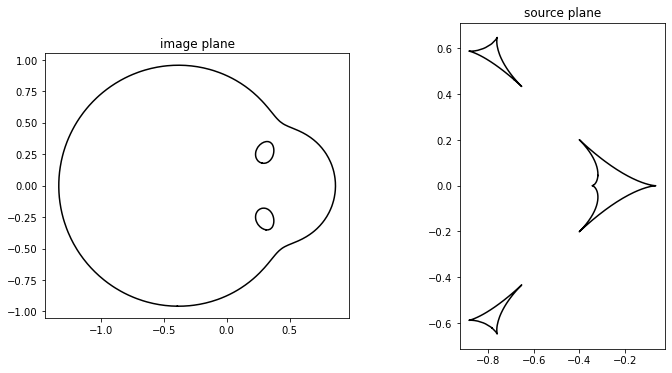

In [7]:
m1 = 0.1
m2 = 0.9

for d in (2.0, 1.709, 1.0, 0.765, 0.74):
    plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
    model = gl.lensmodel([plane])
    model.maingrid(-4,4,40,-2,2,20)
    model.tile()
    model.plot()

Binary light curve

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


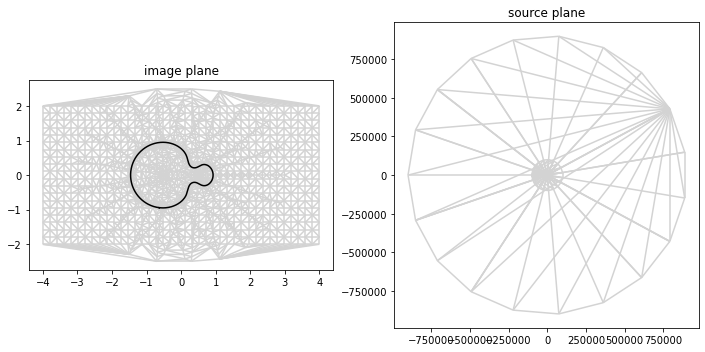

In [8]:
m1 = 0.1
m2 = 0.9
d = 1.0

plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
model = gl.lensmodel([plane])
model.maingrid(-4,4,40,-2,2,20)
model.tile(addlevels=4)
model.plot(plotgrid=True)

/Users/chuckkeeton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


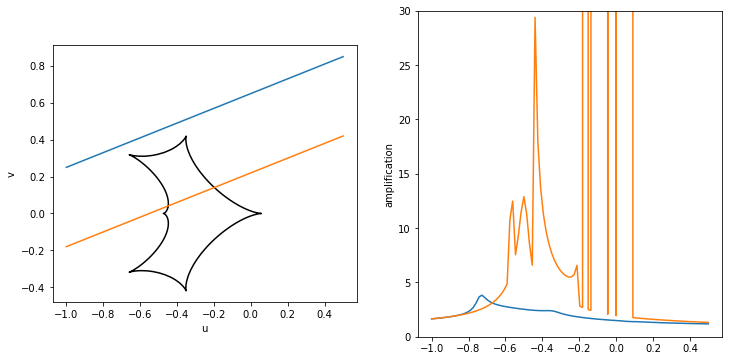

In [9]:
uarr = np.linspace(-1.0,0.5,100)
v1 = 0.4*uarr + 0.65
v2 = 0.4*uarr + 0.22

uv1 = np.column_stack((uarr,v1))
uv2 = np.column_stack((uarr,v2))

lcrv1 = model.totmag(uv1)
lcrv2 = model.totmag(uv2)

f,ax = plt.subplots(1,2,figsize=(12,6))
# caustic(s) and source trajectories
for caus in model.caus:
    ax[0].plot(caus[:,0],caus[:,1],color='black')
ax[0].plot(uarr,v1)
ax[0].plot(uarr,v2)
ax[0].set_aspect('equal')
ax[0].set_xlabel('u')
ax[0].set_ylabel('v')
# light curves
ax[1].plot(uarr,lcrv1)
ax[1].plot(uarr,lcrv2)
ax[1].set_ylim([0,30])
ax[1].set_ylabel('amplification')
f.show()

Important: it looks like the calculation is not completely robust, especially for caustic crossings. I'm still looking into this.